#### This coursework submission will implement image classification for deep learning, using the CIFAR-10(Canadian Institute For Advanced Research) dataset. The structure of this report will follow the workflow for machine learning as outlined in the Deep Learning with Python(DLWP) book by François Chollet.

#### Defining the problem and collect samples and labels

The CIFAR-10 dataset deals with image classification, containing 60000 32x32 colour images in 10 classes, with 6000 images per class(CIFAR-10 and CIFAR-100 datasets, n.d.). The classes are airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships, and trucks. This is a single-label multiclass classification problem. In the realm of neural networks, convolutional neural networks(CNN) are arguably the most suitable for tasks pertaining to computer vision. However, here the main focus will be on developing a basic feedforward neural network model, to observe the limits of its ability for image classification. It will be developed in accordance with the universal machine learning workflow in DLWP(Chollet, 2018). The model first has to produce predictions that will be measured by selected metric/s to beat a common sense baseline check. As each of the 10 class contains an equal amount of image samples, this check can be calculated to be 0.1 or 10%. With further optimisation, the model will be expected to produce results measured by a success metric that is several times the baseline check to achieve at least a 0.5 or 50%.

First import and load the dataset. Extract the train and test segments.

In [39]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

#extract train test splits
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

Check for the number of samples in the train and test segments respectively. As seen below, the output shows a 4-dimensional array, with train segment consisting of 50000 samples of 32 by 32 pixels with RGB(3) while test segment has 10000 samples, 32 by 32 pixels with RGB(3) channels.

In [40]:
import numpy as np

#shows attributes of the arrays in train_images and test_images
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Below shows an example of 20 samples of different classes from the dataset.

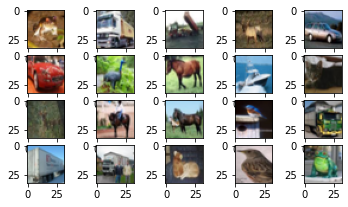

In [41]:
import matplotlib.pyplot as plt

for i in range(20):
    #define subplot
    plt.subplot(5,5, i + 1)
    #plot pixel data
    plt.imshow(train_images[i], cmap=plt.cm.binary)
#diplay the images
plt.show()

#### Choosing success criterion and monitoring metrics

It is important to have tangible observations for tracking progress of the neural network, which is why a criteria for success is neccessary.
To select a criterion metric, the problem has to be evaluated on whether it has balanced-classification or is class-imbalanced. Balanced-classification means that each class has similar or same amount of data samples throughout the dataset while class-imbalanced has substantial variation in the amount of data samples between classes. As CIFAR-10 has equal amount of data samples for each class(6000 samples), it is considered as having balanced-classification. One of the most widely used metrics in balanced-classification problems is accuracy. When each class in the dataset has the similar/same amount of samples(balanced), accuracy is well suited as the neural network model will receive an equivalent level of training accuracy for each class. Accuracy is not recommended if samples in respective classes differ greatly(imbalanced) as this will cause fluctuating levels of training across all the classes. 

For this problem, accuracy is the most suitable metric.

#### Choosing a validation protocol 

When progress reaches a certain stage, measuring how well the neural network model performs on unseen data is a good evaluator of overall performance. There are several validation protocols for two general scenarios, having more than sufficient data or too little data. When data is aplenty, hold-out is suitable as it reserves a portion of the dataset for validation purposes, with enough data for training the neural network. In the scenario of scarce data, cross-validation techniques such as K-fold and iterated K-fold implements shuffling of data samples to ensure that previously seen data can be sufficiently randomised into a fresh set for validation. For image classification problems, a general rule of thumb is to have 1000 representative images for each class(Warden, 2017). CIFAR-10 has more than sufficient with 6000 images for each class, making hold-out a compatible validation protocol. 

To implement hold-out, the test_images and test_labels set will be used as the reserved unseen data for validation after a final neural network model is optimised.

#### Preprocess data

Data to be inputted into a neural network model has to be formatted as tensors(multi-dimensional NumPy array).
The reshape function flattens the train_images and test_images segments that were rank 4 tensors(4-dimensions) into rank 2 tensors(2-dimensions). Normalise the RGB(3 channels) of values 0 to 255 into values of 0 to 1 by dividing by 255. This is due to tensor input received by the model usually has a small range of 0 to 1. A one-hot encoding of the train_labels and test_labels are performed using the to_categorical function.


In [42]:
from tensorflow.keras.utils import to_categorical

#The structure of this code was referenced from Coursera CM3015 MNIST lab 

#flatten tensors(NumPy arrays) and normalise
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype('float32') / 255

#perform a one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### Developing a first underfitting model with statistical power

A model with statistical power is a bare-bones model that produces values that are better than the baseline check. This problem has a baseline check of 0.1 or 10%. A basic neural network model consists of multiple layers, an optimiser and a loss function. 

As seen below, model will be a feedforward network, specified with the Sequential function. Each layer will be a densely-connected layer, with the first layer taking in input shape of (32*32*3) on the first axis and outputting a vector of length 20. The middle layer receives the vector output from the previous layer as input and outputs a vector of length 20 to the last layer. An activation function controls what the output is, with Rectified Linear Unit(relu) being used for the first and middle layer. The last layer outputs a vector of length 10(same as number of classes) with softmax function being used for activation. The optimiser(algorithm for tuning attributes like learning rate) will be set as Root Mean Squared Propagation(RMSprop) with default attributes. The loss function will use categorical crossentropy(as suggested in the DLWP book)(Chollet, 2018) and the metric is accuracy(training). Finally the model will be trained on train_images and train_labels data segments with 50 epoch, each with size of 512 data samples. A validation loss/accuracy metric is added at the end with a 0.2 or 20% split of the data used. 

The results:

As this model is built with minimal capacity in mind(small layer outputs and low number of layers), the training accuracy and validation accuracy metrics seem to be similarly low about the same range, while training loss and validation loss are similarly high at about the same range. This indicates an underfitting model. At epoch 50, training loss is 1.7960 and validation loss is at 1.8954. Training accuracy is 0.3447 while validation accuracy is at 0.3096. As baseline check is 0.1, this model has produced results that are better than the baseline.

In [43]:
from tensorflow.keras import models, layers, optimizers

#The structure of this code was referenced from Coursera CM3015 MNIST lab 

network_underfit = models.Sequential()
#first layer
network_underfit.add(layers.Dense(20, activation='relu', input_shape=(32 * 32 * 3, )))
#middle layer
network_underfit.add(layers.Dense(15, activation='relu'))
#last layer
network_underfit.add(layers.Dense(10, activation='softmax'))

#optimiser
opt = optimizers.RMSprop()

#configure loss and metrics
network_underfit.compile(optimizer=opt,
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

#train the model
history_underfit = network_underfit.fit(train_images, train_labels, epochs=50, batch_size=512,validation_split=0.2)


Epoch 1/50
79/79 [==============================] - 1s 7ms/step - loss: 2.2965 - accuracy: 0.1218 - val_loss: 2.2446 - val_accuracy: 0.1488
Epoch 2/50
79/79 [==============================] - 0s 6ms/step - loss: 2.1633 - accuracy: 0.1989 - val_loss: 2.0790 - val_accuracy: 0.2266
Epoch 3/50
79/79 [==============================] - 0s 6ms/step - loss: 2.0412 - accuracy: 0.2329 - val_loss: 2.0457 - val_accuracy: 0.2282
Epoch 4/50
79/79 [==============================] - 0s 6ms/step - loss: 1.9804 - accuracy: 0.2573 - val_loss: 2.0125 - val_accuracy: 0.2437
Epoch 5/50
79/79 [==============================] - 0s 6ms/step - loss: 1.9463 - accuracy: 0.2736 - val_loss: 1.9615 - val_accuracy: 0.2713
Epoch 6/50
79/79 [==============================] - 0s 5ms/step - loss: 1.9233 - accuracy: 0.2914 - val_loss: 2.0098 - val_accuracy: 0.2636
Epoch 7/50
79/79 [==============================] - 0s 6ms/step - loss: 1.9086 - accuracy: 0.2961 - val_loss: 1.9517 - val_accuracy: 0.2734
Epoch 8/50
79/79 [==

#### Developing a larger overfitting model

Now that a minimal capacity model has been developed, the aim is to create a high capacity model. The model below retains the same structure as the previous model, with some alterations. The number of layers have been incremented by one and each layer(except the last layer) has their output vector length increased.

The results:

This model is built with high capacity in mind, with more layers and larger output vectors than the previous model. At epoch 50, training loss is 0.5069 and validation loss is at 2.9295. Training accuracy is 0.8206 and validation accuracy is at 0.4408. When training loss is significantly lower than validation loss and training accuracy is significantly higher than validation accuracy, this suggests an overfitting model. The model performs well on training data but is unable to generalise to previously unseen data during validation.

In [44]:
network_overfit = models.Sequential()
#first layer
network_overfit.add(layers.Dense(2000, activation='relu', input_shape=(32 * 32 * 3, )))
#second layer
network_overfit.add(layers.Dense(1000, activation='relu'))
#third layer
network_overfit.add(layers.Dense(500, activation='relu'))
#last layer
network_overfit.add(layers.Dense(10, activation='softmax'))

#optimiser
opt = optimizers.RMSprop()

#configure loss and metrics
network_overfit.compile(optimizer=opt,
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

#train the model
history_overfit = network_overfit.fit(train_images, train_labels, epochs=50, batch_size=512,validation_split=0.2)


Epoch 1/50
79/79 [==============================] - 11s 134ms/step - loss: 3.7475 - accuracy: 0.1611 - val_loss: 2.1476 - val_accuracy: 0.1927
Epoch 2/50
79/79 [==============================] - 10s 131ms/step - loss: 2.1254 - accuracy: 0.2312 - val_loss: 2.2580 - val_accuracy: 0.2090
Epoch 3/50
79/79 [==============================] - 10s 132ms/step - loss: 2.0249 - accuracy: 0.2682 - val_loss: 2.2327 - val_accuracy: 0.2189
Epoch 4/50
79/79 [==============================] - 11s 138ms/step - loss: 1.9227 - accuracy: 0.3035 - val_loss: 2.0089 - val_accuracy: 0.2736
Epoch 5/50
79/79 [==============================] - 10s 133ms/step - loss: 1.8724 - accuracy: 0.3281 - val_loss: 2.0694 - val_accuracy: 0.2700
Epoch 6/50
79/79 [==============================] - 10s 132ms/step - loss: 1.8188 - accuracy: 0.3487 - val_loss: 1.8860 - val_accuracy: 0.3152
Epoch 7/50
79/79 [==============================] - 10s 132ms/step - loss: 1.7661 - accuracy: 0.3644 - val_loss: 2.0890 - val_accuracy: 0.2766

#### Regularizing overfitting model and tune hyperparameters based on validation performance

An optimal model is one that has the ability to generalise on previously unseen data, fitting in the middle between underfitting and overfitting capacities. To develop the ability, regularisation can be used to constrain an overfitting model's capacity. L2 regularisation applies cost proportional to the square of the model's weight coefficients to the loss function in order to minimise influence of large weights. The strength of the regularisation is applied at a value of 0.0002.

Hyperparameters are model attributes that can be controlled for and optimised. This model has tuned hyperparameters such as length of layer output vector, optimiser type and learning rate. The length of output vectors for the layers have been reduced in comparision to the overfitting model. The optimiser has changed from RMSprop to Adam, both of which are based on stochastic gradient-based optimisation. The learning rate has been set to a value of 0.0005.

The results:

At epoch 50, training loss is 1.0201 and training accuracy is at 0.6858. Validation loss is 1.5150 and validation accuracy is at 0.5388. The values are an improvement over the overfitting model with a significant reduction in validation loss(almost halved) and an substantial increase in validation accuracy(almost 0.1 or 10%). Validation accuracy has also met the 0.5 or 50% goal set out in the beginning.

In [75]:
from tensorflow.keras import regularizers

network_final = models.Sequential()
#first layer
network_final.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.0002), activation='relu', input_shape=(32 * 32 * 3, )))
#second layer
network_final.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.0002), activation='relu'))
#third layer
network_final.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.0002), activation='relu'))
#last layer
network_final.add(layers.Dense(10, activation='softmax'))


#optimiser
opt = optimizers.Adam(learning_rate=0.0005)

#configure loss and metrics
network_final.compile(optimizer=opt,
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

#train the model
history_final = network_final.fit(train_images, train_labels, epochs=50, batch_size=512,validation_split=0.2)

Epoch 1/50
79/79 [==============================] - 3s 31ms/step - loss: 2.2289 - accuracy: 0.2821 - val_loss: 2.0788 - val_accuracy: 0.3361
Epoch 2/50
79/79 [==============================] - 2s 29ms/step - loss: 1.9805 - accuracy: 0.3675 - val_loss: 1.9463 - val_accuracy: 0.3658
Epoch 3/50
79/79 [==============================] - 2s 29ms/step - loss: 1.8668 - accuracy: 0.3947 - val_loss: 1.8984 - val_accuracy: 0.3735
Epoch 4/50
79/79 [==============================] - 2s 29ms/step - loss: 1.7814 - accuracy: 0.4210 - val_loss: 1.8508 - val_accuracy: 0.3971
Epoch 5/50
79/79 [==============================] - 2s 29ms/step - loss: 1.7312 - accuracy: 0.4347 - val_loss: 1.7793 - val_accuracy: 0.4158
Epoch 6/50
79/79 [==============================] - 2s 29ms/step - loss: 1.6845 - accuracy: 0.4487 - val_loss: 1.7154 - val_accuracy: 0.4343
Epoch 7/50
79/79 [==============================] - 2s 29ms/step - loss: 1.6432 - accuracy: 0.4604 - val_loss: 1.7075 - val_accuracy: 0.4415
Epoch 8/50
79

Here is a plot comparison of all three models using training and validation loss, to visualise the effects of underfitting and overfitting and picking an in-between with the tuned model.

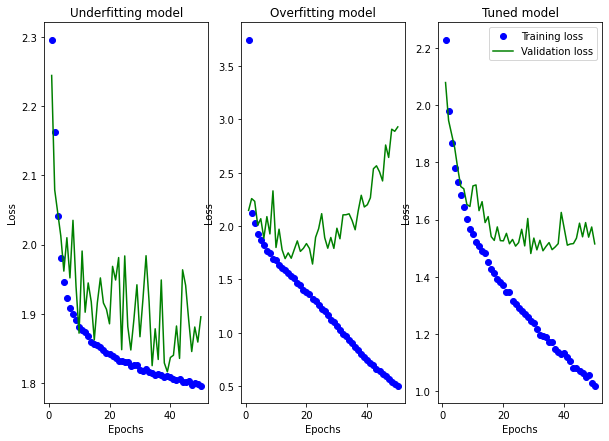

In [76]:
#get history data from the respective model outputs
history_dict_underfit = history_underfit.history
history_dict_overfit = history_overfit.history
history_dict_final = history_final.history
history_dict_underfit.keys()
history_dict_overfit.keys()
history_dict_final.keys()

#extract training loss and validation loss data
loss_underfit = history_dict_underfit['loss']
val_loss_underfit = history_dict_underfit['val_loss']
loss_overfit = history_dict_overfit['loss']
val_loss_overfit = history_dict_overfit['val_loss']
loss_final = history_dict_final['loss']
val_loss_final = history_dict_final['val_loss']

#shapes and colours for plot
blue_dots = 'bo'
green_line = 'g'

#number of epochs
epochs = range(1, len(loss_underfit) + 1)

#define attributes and inputs for the subplots
fig, axs = plt.subplots(1,3,figsize=(10,7))
axs[0].set_title('Underfitting model')
axs[0].plot(epochs, loss_underfit, blue_dots, label = 'Training loss')
axs[0].plot(epochs, val_loss_underfit, green_line, label = 'Validation loss')
axs[1].set_title('Overfitting model')
axs[1].plot(epochs, loss_overfit, blue_dots, label = 'Training loss')
axs[1].plot(epochs, val_loss_overfit, green_line, label = 'Validation loss')
axs[2].set_title('Tuned model')
axs[2].plot(epochs, loss_final, blue_dots, label = 'Training loss')
axs[2].plot(epochs, val_loss_final, green_line, label = 'Validation loss')

for ax in axs.flat:
    ax.set(xlabel='Epochs', ylabel='Loss')

#display legend and figures
plt.legend()
plt.show()

#### Retrain on the entire training set and validate on the unseen test set

Now the tuned model has to be trained on all available training data(including validation).

The results:

At epoch 50, training loss is 0.7348 and training accuracy is at 0.8060, indicating relatively high level of prediction on training data.

In [77]:
#retrain on entire training set
network_final.fit(train_images, train_labels, epochs=50, batch_size=512)

Epoch 1/50
98/98 [==============================] - 3s 26ms/step - loss: 1.1234 - accuracy: 0.6538
Epoch 2/50
98/98 [==============================] - 3s 27ms/step - loss: 1.0982 - accuracy: 0.6607
Epoch 3/50
98/98 [==============================] - 3s 26ms/step - loss: 1.0985 - accuracy: 0.6618
Epoch 4/50
98/98 [==============================] - 3s 26ms/step - loss: 1.0756 - accuracy: 0.6693
Epoch 5/50
98/98 [==============================] - 3s 27ms/step - loss: 1.0637 - accuracy: 0.6747
Epoch 6/50
98/98 [==============================] - 3s 27ms/step - loss: 1.0508 - accuracy: 0.6779
Epoch 7/50
98/98 [==============================] - 3s 27ms/step - loss: 1.0484 - accuracy: 0.6791
Epoch 8/50
98/98 [==============================] - 3s 28ms/step - loss: 1.0462 - accuracy: 0.6800
Epoch 9/50
98/98 [==============================] - 3s 27ms/step - loss: 1.0252 - accuracy: 0.6903
Epoch 10/50
98/98 [==============================] - 3s 27ms/step - loss: 1.0234 - accuracy: 0.6872
Epoch 11/

To validate on unseen data, it will be tested on the reserved test_images and test_labels segments. This technique is known as hold-out validation.

The results:

After evaluating on the previously unseen test segments, the testing loss is 1.7929 and the testing accuracy is at 0.5376.
These values are similar to the validation loss and validation accuracy values in the "Regularizing overfitting model and tune hyperparameters based on validation performance" section. This shows that the validation process is correct and corroborable. The initial goal of beating the 0.5 or 50% has also been achieved by the model on this test data.

In [78]:
#evaluating on test data
network_final.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.7929 - accuracy: 0.5376


[1.7929482460021973, 0.5375999808311462]

##### References

Chollet, F., 2018. Deep learning with Python. pp.111,114.

Cs.toronto.edu. n.d. CIFAR-10 and CIFAR-100 datasets. [online] Available at: <https://www.cs.toronto.edu/~kriz/cifar.html> [Accessed 3 March 2022].

Warden, P., 2017. How many images do you need to train a neural network?. [online] Pete Warden's blog. Available at: <https://petewarden.com/2017/12/14/how-many-images-do-you-need-to-train-a-neural-network/> [Accessed 3 March 2022].
